In [2]:
import pandas as pd
from pandas import Series
import matplotlib as mpl
from matplotlib import pyplot as plt
import boto3 #Need to read and write files to aws s3 bucket
from io import BytesIO as StringIO 
import numpy as np

In [4]:
#Data I got from a Report
client=boto3.client('s3')
obj=client.get_object(Bucket='prod-sdc-tti-911061262852-us-east-1-bucket',Key='abibeka/Data/MergeRwisVolDat.csv')
dat=pd.read_csv(obj['Body'])
dat=dat.drop(columns='Unnamed: 0')
dat.head()

,Milepost,DateTime,deviceId,AvgSpdClass0,AvgSpdClass1,AvgSpdClass2,AvgSpdClass3,VolClass0,VolClass1,VolClass2,...,avgwindgust,avgwinddir,setwinddir,setprecpints,avgprecprt,avgprecpaccm,avgvisft,setprecptyp,avgchempct,setsurfstat
0,317.68,2018-02-01 00:05:00,396,0.0,70.780001,61.000000,61.526750,0,2,2,...,12.0,254.0,"[""W"",""W""]","[""None"",""None""]",0.0,-99999.0,6560.0,"[""None"",""None""]",-99999.0,"[""Trace Moisture"",""Trace Moisture""]"
1,317.68,2018-02-01 00:10:00,396,0.0,58.927500,72.236666,67.304667,0,4,3,...,10.0,260.0,"[""W"",""W""]","[""None"",""None""]",0.0,-99999.0,6560.0,"[""None"",""None""]",-99999.0,"[""Trace Moisture"",""Trace Moisture""]"
2,317.68,2018-02-01 00:15:00,396,0.0,70.224998,0.000000,62.865694,0,2,0,...,9.0,261.0,"[""W"",""W""]","[""None"",""None""]",0.0,-99999.0,6560.0,"[""None"",""None""]",-99999.0,"[""Trace Moisture"",""Trace Moisture""]"
3,317.68,2018-02-01 00:20:00,396,0.0,68.897777,64.847499,63.055002,0,5,3,...,9.0,256.0,"[""W"",""W""]","[""Slight"",""Slight""]",0.0,-99999.0,6560.0,"[""Snow"",""Snow""]",-99999.0,"[""Trace Moisture"",""Trace Moisture""]"
4,317.68,2018-02-01 00:25:00,396,0.0,64.570000,0.000000,66.067500,0,1,0,...,9.0,250.0,"[""W"",""W""]","[""Slight"",""Slight""]",0.0,-99999.0,6000.0,"[""Snow"",""Snow""]",-99999.0,"[""Trace Moisture"",""Trace Moisture""]"


In [5]:
#dat=dat.set_index(keys=['deviceId','DateTime'])
#dat.head()

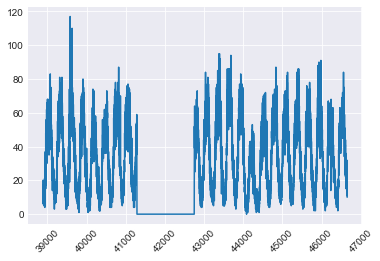

In [7]:
(Series(dat[dat.deviceId==384].TotVeh)).plot()
plt.xticks(rotation=45)
plt.style.use('seaborn-darkgrid')
plt.show()
#ax.set_xlim('2018-02-01 00:00:00','2018-02-28 00:00:00')

In [12]:
dat2 = dat.loc[:,['Milepost','DateTime','TotVeh']].copy()
dat2.head()

,Milepost,DateTime,TotVeh
0,317.68,2018-02-01 00:05:00,13
1,317.68,2018-02-01 00:10:00,22
2,317.68,2018-02-01 00:15:00,15
3,317.68,2018-02-01 00:20:00,14
4,317.68,2018-02-01 00:25:00,12


In [25]:
HeatMapDat=pd.pivot_table(dat2,index='Milepost',columns='DateTime',values='TotVeh').values

In [30]:
HeatMapDat_NP=np.array(HeatMapDat)

In [34]:
fig,ax=plt.subplots()
im=ax.imshow(HeatMapDat_NP,cmap='hot')
fig.tight_layout()
plt.show()

In [5]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [6]:
plt.close()

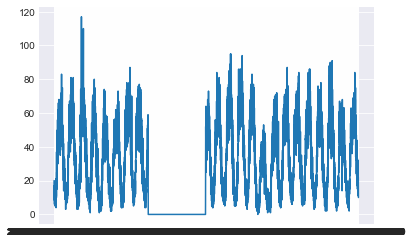

In [11]:
sns.lineplot(data=dat.loc[384].TotVeh)
plt.show()